In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
def Jacobi(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  norma_it=1+tol
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  while (ite<maxit and norma_it>tol):
    x_old=np.copy(x)
    for i in range(0,n):
      #x[i]=(b[i]-sum([A[i,j]*x_old[j] for j in range(0,i)])-sum([A[i, j]*x_old[j] for j in range(i+1,n)]))/A[i,i]
      x[i]=(b[i]-np.dot(A[i,0:i],x_old[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i]
    ite=ite+1
    norma_it = np.linalg.norm(x_old-x)/np.linalg.norm(x_old)
    relErr[ite] = np.linalg.norm(xTrue-x)/np.linalg.norm(xTrue)
    errIter[ite-1] = norma_it
  relErr=relErr[:ite]
  errIter=errIter[:ite]  
  return [x, ite, relErr, errIter]




def GaussSeidel(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  errIter[0]=tol+1
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  while ( ite < maxit and errIter[ite] > tol ):   
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]=(b[i]-np.dot(A[i,0:i],x[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i] 
    ite=ite+1
    relErr[ite] = np.linalg.norm(xTrue-x)/np.linalg.norm(xTrue)
    errIter[ite] = np.linalg.norm(x-x_old)/np.linalg.norm(x)  #fine ciclo
  relErr=relErr[:ite]
  errIter=errIter[:ite] 
  return [x, ite, relErr, errIter]

In [3]:
n = 10
A = 5*np.eye(n)
A = A + np.diag(np.ones(n-1),  1)
A = A + np.diag(np.ones(n-1),  -1)
print(A)

xTrue = np.ones( (n,1) )
b = np.matmul (A, xTrue) 


x0 = np.zeros( (n,1) )
maxit = 200
tol = 1.e-6
(xJacobi, kJacobi, relErrJacobi, errIterJacobi) = Jacobi(A,b,x0,maxit,tol,xTrue) 
(xGS, kGS, relErrGS, errIterGS) = GaussSeidel(A,b,x0,maxit,tol,xTrue) 

print('\nSoluzione calcolata da Jacobi:' )
for i in range(n):
    print('%0.2f' %xJacobi[i])

print('\nSoluzione calcolata da Gauss Seidel:' )
for i in range(n):
    print('%0.2f' %xGS[i])

[[5. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 5. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 5. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 5. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 5. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 5. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 5. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 5. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 5. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]]

Soluzione calcolata da Jacobi:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00

Soluzione calcolata da Gauss Seidel:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00


C:\Users\sharo\AppData\Local\Temp\ipykernel_3104\3970739959.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  norma_it = np.linalg.norm(x_old-x)/np.linalg.norm(x_old)


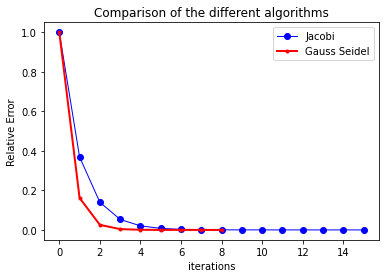

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

rangeJabobi = range (0, kJacobi)
rangeGS = range(0, kGS)

ax.plot(rangeJabobi, relErrJacobi, label='Jacobi', color='blue', linewidth=1, marker='o'  )
ax.plot(rangeGS, relErrGS, label='Gauss Seidel', color = 'red', linewidth=2, marker='.' )
legend = ax.legend(loc='upper right')
plt.xlabel('iterations')
plt.ylabel('Relative Error')
plt.title('Comparison of the different algorithms')
plt.show()